In [24]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split, KFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [25]:
df_dev = pd.read_csv('../dataset/development.csv')
df_eval = pd.read_csv('../dataset/evaluation.csv')

df = pd.concat([df_dev, df_eval], sort=False)
df.head()

,id,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,0,http://mashable.com/2014/09/08/safest-cabbies-...,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,...,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900.0,bus,tuesday
1,1,http://mashable.com/2013/07/25/3d-printed-rifle/,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,...,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300.0,tech,thursday
2,2,http://mashable.com/2013/10/30/digital-dinosau...,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,...,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700.0,lifestyle,wednesday
3,3,http://mashable.com/2014/08/27/homer-simpson-i...,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,...,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500.0,bus,wednesday
4,4,http://mashable.com/2013/01/10/creepy-robotic-...,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,...,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400.0,tech,thursday


In [26]:
df_dev.shape

(31715, 50)

## One hot encoding

In [27]:
enc = OneHotEncoder()
encoded_df = pd.concat([df_dev['weekday'], df_dev['data_channel']], axis=1)
enc.fit(encoded_df)
encoded_df = enc.transform(encoded_df)
additional_columns = enc.get_feature_names_out()
print(encoded_df.toarray().shape)
working_df_dev = df_dev.copy()
working_df_dev[additional_columns] = encoded_df.toarray()
working_df_dev.drop(['weekday', 'data_channel', 'url', 'id'], axis = 1, inplace=True)
working_df_dev

(31715, 13)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,data_channel_bus,data_channel_entertainment,data_channel_lifestyle,data_channel_socmed,data_channel_tech,data_channel_world
0,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,33.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,NaN,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,4.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,0.0,NaN,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,NaN,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31710,37.0,11.0,440.0,0.564103,1.0,0.718978,10.0,2.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31711,52.0,14.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31712,121.0,9.0,969.0,0.489583,1.0,0.710623,6.0,5.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31713,503.0,11.0,1976.0,0.412308,1.0,0.621080,21.0,3.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### dropping based on mutlivariate analysis

In [28]:
working_df_dev.drop(columns=['n_unique_tokens','n_non_stop_words','kw_max_min','kw_min_max','kw_max_avg','abs_title_sentiment_polarity',
                     'abs_title_subjectivity','rate_positive_words','timedelta','max_negative_polarity','min_negative_polarity',
                     'kw_min_min','kw_max_max','num_self_hrefs','data_channel_bus','LDA_00'], inplace=True)

### n_tokens_content: logarithmically scaled

In [29]:
working_df_dev = working_df_dev.query("n_tokens_content > 0")

In [30]:
working_df_dev['n_tokens_content'] = np.log(working_df_dev['n_tokens_content'])
# working_df_dev.drop(columns=['n_tokens_content'], inplace = True)
# std_scaler = StandardScaler().fit(working_df_dev[['n_tokens_content']])
# scaled_features = std_scaler.transform(working_df_dev[['n_tokens_content']])
# working_df_dev[['n_tokens_content']] = scaled_features
# working_df_dev['n_tokens_content'].hist()

/var/tmp/ipykernel_388892/4107790530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df_dev['n_tokens_content'] = np.log(working_df_dev['n_tokens_content'])


### num_imgs: null values filled with the mean and then scale the feature to logarithmic scale

In [31]:
working_df_dev['num_imgs'].fillna(working_df_dev['num_imgs'].mean(), inplace=True)
working_df_dev['num_imgs'] = np.log(1+working_df_dev['num_imgs'])
# std_scaler = StandardScaler().fit(working_df_dev[['num_imgs']])
# scaled_features = std_scaler.transform(working_df_dev[['num_imgs']])
# working_df_dev[['num_imgs']] = scaled_features

/var/tmp/ipykernel_388892/1065005467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df_dev['num_imgs'].fillna(working_df_dev['num_imgs'].mean(), inplace=True)
/var/tmp/ipykernel_388892/1065005467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df_dev['num_imgs'] = np.log(1+working_df_dev['num_imgs'])


### num_videos: null values filled with the mean and then scale the feature to logarithmic scale

In [32]:
working_df_dev['num_videos'].fillna(working_df_dev['num_videos'].mean(), inplace=True)
# std_scaler = StandardScaler().fit(working_df_dev[['num_videos']])
# scaled_features = std_scaler.transform(working_df_dev[['num_videos']])
# working_df_dev[['num_videos']] = scaled_features

/var/tmp/ipykernel_388892/694069239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df_dev['num_videos'].fillna(working_df_dev['num_videos'].mean(), inplace=True)


In [33]:
std_scaler = StandardScaler().fit(working_df_dev[['n_tokens_title', 'n_tokens_content']])
scaled_features = std_scaler.transform(working_df_dev[['n_tokens_title', 'n_tokens_content']])
working_df_dev[['n_tokens_title', 'n_tokens_content']] = scaled_features

# std_scaler = StandardScaler().fit(working_df_dev[['n_tokens_title']])
# scaled_features = std_scaler.transform(working_df_dev[['n_tokens_title']])
# working_df_dev[['n_tokens_title']] = scaled_features

/var/tmp/ipykernel_388892/998106049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df_dev[['n_tokens_title', 'n_tokens_content']] = scaled_features


In [34]:
working_df_dev['shares'] = np.log(working_df_dev['shares'])

/var/tmp/ipykernel_388892/1418335988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df_dev['shares'] = np.log(working_df_dev['shares'])


In [35]:
# Remove outliers from kw_avg_avg (we lost another 9% of the dataset)
q1 = working_df_dev['kw_avg_avg'].describe()['25%']
q3 = working_df_dev['kw_avg_avg'].describe()['75%']
iqr = q3 - q1
min_kw_avg_avg = q1 - 1.5*iqr
max_kw_avg_avg = q3 + 1.5*iqr
working_df_dev = working_df_dev[(df_dev.kw_avg_avg < max_kw_avg_avg) & (df_dev.kw_avg_avg > min_kw_avg_avg)]

working_df_dev.drop(columns=['kw_avg_min'], inplace=True)

std_scaler = StandardScaler().fit(working_df_dev[['kw_avg_max', 'kw_min_avg', 'kw_avg_avg']])
scaled_features = std_scaler.transform(working_df_dev[['kw_avg_max', 'kw_min_avg', 'kw_avg_avg']])
working_df_dev[['kw_avg_max', 'kw_min_avg', 'kw_avg_avg']] = scaled_features

/var/tmp/ipykernel_388892/1339260126.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  working_df_dev = working_df_dev[(df_dev.kw_avg_avg < max_kw_avg_avg) & (df_dev.kw_avg_avg > min_kw_avg_avg)]


In [36]:
working_df_dev.drop(columns=['self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess'], inplace=True)

### num_hrefs: logarithmic scale

In [37]:
working_df_dev['num_hrefs'] = np.log(1 + working_df_dev['num_hrefs'])
# working_df_dev.drop(columns=['num_hrefs'], inplace = True)
# std_scaler = StandardScaler().fit(working_df_dev[['num_hrefs']])
# scaled_features = std_scaler.transform(working_df_dev[['num_hrefs']])
# working_df_dev[['num_hrefs']] = scaled_features

In [38]:
working_df_dev.drop(columns=['LDA_01', 'LDA_02', 'LDA_03', 'LDA_04'], inplace=True)

In [39]:
# Transform weekdays into a boolean status "isWeekend" since we've observed that the principal discrimination is based on
# weather the article is published on the weekend or not
is_weekend = []
for _, row in working_df_dev.iterrows():
    if row['weekday_sunday'] == 1 or row['weekday_saturday'] == 1:
        is_weekend.append(1)
    else:
        is_weekend.append(0)
working_df_dev['is_weekend'] = is_weekend
working_df_dev.drop(columns=[x for x in additional_columns if x.startswith('weekday')], inplace=True)

In [40]:
# q1 = df_dev['kw_min_avg'].describe()['25%']
# q3 = df_dev['kw_min_avg'].describe()['75%']
# iqr = q3 - q1
# min_kw_avg_avg = q1 - 1.5*iqr
# max_kw_avg_avg = q3 + 1.5*iqr
# new_df_kw_avg_avg = df_dev[(df_dev.kw_avg_avg < max_kw_avg_avg) & (df_dev.kw_avg_avg > min_kw_avg_avg)]
# print(len(new_df_kw_avg_avg), len(df_dev))
# print(len(new_df_kw_avg_avg) / len(df_dev))

/var/tmp/ipykernel_388892/706698007.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  working_df_dev['num_keywords'] = df_dev.groupby(['data_channel'], sort=False)['num_keywords'].apply(lambda x: x.fillna(x.mean())).reset_index()['num_keywords']


<Axes: >

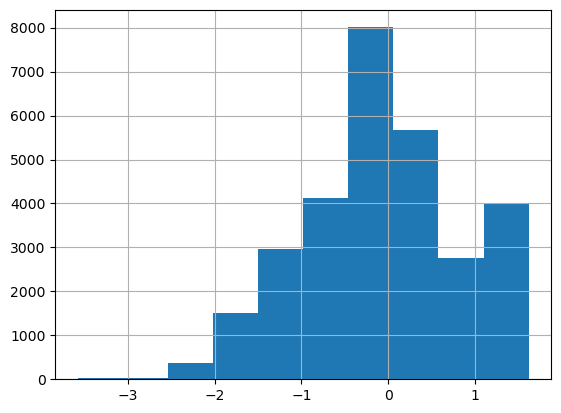

In [41]:
# Num Keywords improve its distribution when we fill the NaN values with the mean based on the data channel
new_df_keywords = df_dev.copy()
working_df_dev['num_keywords'] = df_dev.groupby(['data_channel'], sort=False)['num_keywords'].apply(lambda x: x.fillna(x.mean())).reset_index()['num_keywords']

std_scaler = StandardScaler().fit(working_df_dev[['num_keywords']])
scaled_features = std_scaler.transform(working_df_dev[['num_keywords']])
working_df_dev[['num_keywords']] = scaled_features

In [42]:

# working_df_dev.drop(columns=['kw_min_avg',
# 'rate_negative_words',
# 'title_sentiment_polarity',
# 'num_keywords',
# 'min_positive_polarity',
# 'max_positive_polarity',
# 'is_weekend',
# 'data_channel_tech',
# 'data_channel_entertainment',
# 'data_channel_socmed',
# 'data_channel_lifestyle',
# 'data_channel_world',
# 'num_imgs',
# 'num_videos',
# 'global_rate_negative_words',
# ], inplace=True)

In [43]:
X = working_df_dev.drop(columns=["shares"]).values
y = working_df_dev["shares"].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, random_state=42)

In [44]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [45]:
working_df_dev.shape

(29450, 29)

### all the features has been used to train xgboost regressor and others. I tried also to decrease the number but the score decreases

In [46]:

xgbr = XGBRegressor(n_estimators=500, learning_rate=0.01, eval_metric = 'rmsle')
xgb_r = xgbr.fit(X_train, y_train)
pred = xgb_r.predict(X_valid)
rms = mean_squared_error(y_valid, pred, squared=False)
print(rms)
r2 = r2_score(y_valid, pred)
adj_r2 = 1-(1-r2)*(len(X_valid) - 1)/(len(X_valid) - X_valid.shape[1] - 1)
print(adj_r2)

0.8284079540053488
0.13173807750635036


In [53]:
rreg = RandomForestRegressor(n_estimators=100)
rreg.fit(X_train, y_train)
rms = mean_squared_error(y_valid, rreg.predict(X_valid), squared=False)
print(rms)
r2 = r2_score(y_valid, rreg.predict(X_valid))
adj_r2 = 1-(1-r2)*(len(X_valid) - 1)/(len(X_valid) - X_valid.shape[1] - 1)
print(adj_r2)

0.8378287510810143
0.11187774196721634


### recall that for each of these models you can check the feature importance, so that remove some features

In [47]:
feature_names = working_df_dev.drop(columns=["shares"]).columns
sorted(zip(feature_names, xgb_r.feature_importances_), key=lambda x: x[1], reverse=True)

[('data_channel_tech', 0.1563371),
 ('kw_avg_avg', 0.12027372),
 ('data_channel_socmed', 0.07851338),
 ('data_channel_entertainment', 0.07000306),
 ('is_weekend', 0.056433074),
 ('data_channel_lifestyle', 0.033759877),
 ('kw_min_avg', 0.033008665),
 ('data_channel_world', 0.03147098),
 ('num_hrefs', 0.026406191),
 ('min_positive_polarity', 0.025813013),
 ('global_subjectivity', 0.02474313),
 ('num_videos', 0.0245458),
 ('kw_avg_max', 0.024481896),
 ('num_imgs', 0.022690505),
 ('title_subjectivity', 0.022096708),
 ('title_sentiment_polarity', 0.021878142),
 ('global_sentiment_polarity', 0.021053853),
 ('n_tokens_content', 0.020581577),
 ('average_token_length', 0.020086395),
 ('global_rate_negative_words', 0.020071955),
 ('avg_negative_polarity', 0.02002607),
 ('n_non_stop_unique_tokens', 0.020018425),
 ('rate_negative_words', 0.019788092),
 ('avg_positive_polarity', 0.019588307),
 ('global_rate_positive_words', 0.01914742),
 ('max_positive_polarity', 0.018795239),
 ('num_keywords', 0.0

In [56]:
enc = OneHotEncoder()
encoded_df = pd.concat([df_eval['weekday'], df_eval['data_channel']], axis=1)
enc.fit(encoded_df)
encoded_df = enc.transform(encoded_df)
additional_columns = enc.get_feature_names_out()
working_df_eval = df_eval.copy()
working_df_eval[additional_columns] = encoded_df.toarray()
working_df_eval.drop(['weekday', 'data_channel', 'url', 'id'], axis = 1, inplace=True)
working_df_eval.drop(columns=['n_unique_tokens','n_non_stop_words','kw_max_min','kw_min_max','kw_max_avg','abs_title_sentiment_polarity',
                     'abs_title_subjectivity','rate_positive_words','timedelta','max_negative_polarity','min_negative_polarity',
                     'kw_min_min','kw_max_max','num_self_hrefs','data_channel_bus','LDA_00'], inplace=True)
working_df_eval['n_tokens_content'] = np.log(1+working_df_eval['n_tokens_content'])
working_df_eval['num_imgs'].fillna(working_df_eval['num_imgs'].mean(), inplace=True)
working_df_eval['num_imgs'] = np.log(1+working_df_eval['num_imgs'])
working_df_eval['num_videos'].fillna(working_df_eval['num_videos'].mean(), inplace=True)
std_scaler = StandardScaler().fit(working_df_eval[['n_tokens_title', 'n_tokens_content']])
scaled_features = std_scaler.transform(working_df_eval[['n_tokens_title', 'n_tokens_content']])
working_df_eval[['n_tokens_title', 'n_tokens_content']] = scaled_features

working_df_eval.drop(columns=['kw_avg_min'], inplace=True)

std_scaler = StandardScaler().fit(working_df_eval[['kw_avg_max', 'kw_min_avg', 'kw_avg_avg']])
scaled_features = std_scaler.transform(working_df_eval[['kw_avg_max', 'kw_min_avg', 'kw_avg_avg']])
working_df_eval[['kw_avg_max', 'kw_min_avg', 'kw_avg_avg']] = scaled_features
working_df_eval.drop(columns=['self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess'], inplace=True)
working_df_eval['num_hrefs'] = np.log(1 + working_df_eval['num_hrefs'])
working_df_eval.drop(columns=['LDA_01', 'LDA_02', 'LDA_03', 'LDA_04'], inplace=True)
# Transform weekdays into a boolean status "isWeekend" since we've observed that the principal discrimination is based on
# weather the article is published on the weekend or not
is_weekend = []
for _, row in working_df_eval.iterrows():
    if row['weekday_sunday'] == 1 or row['weekday_saturday'] == 1:
        is_weekend.append(1)
    else:
        is_weekend.append(0)
working_df_eval['is_weekend'] = is_weekend
working_df_eval.drop(columns=[x for x in additional_columns if x.startswith('weekday')], inplace=True)
# Num Keywords improve its distribution when we fill the NaN values with the mean based on the data channel
new_df_keywords = df_dev.copy()
working_df_eval['num_keywords'] = df_dev.groupby(['data_channel'], sort=False)['num_keywords'].apply(lambda x: x.fillna(x.mean())).reset_index()['num_keywords']

std_scaler = StandardScaler().fit(working_df_eval[['num_keywords']])
scaled_features = std_scaler.transform(working_df_eval[['num_keywords']])
working_df_eval[['num_keywords']] = scaled_features
# working_df_eval.drop(columns=['kw_min_avg','rate_negative_words','title_sentiment_polarity','num_keywords','min_positive_polarity','max_positive_polarity','is_weekend','data_channel_tech','data_channel_entertainment','data_channel_socmed','data_channel_lifestyle','data_channel_world', 'num_imgs', 'num_videos',
#                               'global_rate_negative_words', 'global_sentiment_polarity', 'avg_negative_polarity', 'num_hrefs', 'n_tokens_title', 'title_subjectivity',], inplace=True)


/var/tmp/ipykernel_388892/829552089.py:40: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  working_df_eval['num_keywords'] = df_dev.groupby(['data_channel'], sort=False)['num_keywords'].apply(lambda x: x.fillna(x.mean())).reset_index()['num_keywords']


In [57]:
X = working_df_dev.drop(columns=["shares"]).values
y = working_df_dev["shares"].values

In [50]:
xgbr = XGBRegressor(n_estimators=500, learning_rate=0.01, eval_metric = 'rmsle')
xgb_r = xgbr.fit(X, y)
xgb_r.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [51]:
X_test = working_df_eval.values

y_pred = xgb_r.predict(X_test)
final_preds = np.exp(y_pred)

id_col = df_eval['id']
new_df = pd.DataFrame(columns=['Id', 'Predicted'])
new_df['Id'] = id_col
new_df['Predicted'] = final_preds

new_df.to_csv('../output.csv', columns=['Id','Predicted'], index=False)

In [59]:
rreg = RandomForestRegressor(n_estimators=200)
randreg = rreg.fit(X, y)
randreg.fit(X, y)

RandomForestRegressor(n_estimators=200)

In [60]:
X_test = working_df_eval.values

y_pred = randreg.predict(X_test)
final_preds = np.exp(y_pred)

id_col = df_eval['id']
new_df = pd.DataFrame(columns=['Id', 'Predicted'])
new_df['Id'] = id_col
new_df['Predicted'] = final_preds

new_df.to_csv('../output.csv', columns=['Id','Predicted'], index=False)

0.8678733488773915
0.0470394129484184
